In [1]:
import aocd
from aocd.models import Puzzle
day = 25
year = 2021
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [36]:
import numpy as np
from scipy.ndimage import generic_filter
import matplotlib.pyplot as plt

In [6]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(137,
 ['>>vv..>v..>vv.....>vv...>.>...>>......v>v>.v.v..>v..v>.>v.....v..>vvvv.>.>vv>v..v>.v>..v>>>>.>vv.>>vv>.>>v..>.v.v>v>v.>vv.>.......vv.>.>>v.',
  'v>.>v>.v....>>v.vvv>.>>..>....>.v>.v>vv.v..v.v..v>.>.v>.>..>>v.vvvvv..>>..v.v..>>v>vv>.v..vvv.>v..v>>>v.v..>>...>vv..>>v.v>>.>v>.>.v....>>.',
  'v.>vv....v>..v>>..v.>>.....vv..>.vvv>.....v.v>vvv>..v>>..v...>...>...vv.v..>.vvv>>.v>vv..v.>>>....vv.>.>..v..vv.>>v>.>>.>>.v>>>>.>v.v.>v..v',
  '.v.>>..v...v>v.>>>>v....>.....>...v.v..>.v...>.v.....>>.v>v...>.>.>..>v>>>>.v.>..>......>.v>>.>v..>.>vv.>.v>...v.>v.>>.>...>>>..>>>.vv>..v.',
  '.....v.>.v>........>>.>.>vvv.vv>>.>vvv.v.>vvv.....v..>v..>vvv.>.v>.>..v..vv.>...v>>>>vv>.v..v.>..>..vvvv.>.>vvv....v>..>...v...v.v>v.>..v.v',
  '>..>..>..v.>>..v>..vv....>vv.vv>..>v........>..vv>.>.v.>...v.>v...vvv>.....v..vv...vv>.......v>vv.vv.>.vv..v>..v.v.>..>>>.v..vv>...v>vv..>v',
  '.v.>..vv>.>>v>...>.>.>..>.vvv..v>v.v>>.v...v.vv..v..vvv..vv.v.vv...>v..v....>>>>..vvv>v..>.vv.v.>...>vv>......v...>.v...v

In [9]:
test_data = """..........
.>v....v..
.......>..
..........""".splitlines()

test_data2 = """...>...
.......
......>
v.....>
......>
.......
..vvv..""".splitlines()

test_data3 = """v...>>.vv>
.vv>>.vv..
>>.>v>...v
>>v>>.>.v.
v>v.vv.v..
>.>>..v...
.vv..>.>v.
v.v..>>v.v
....v..v.>""".splitlines()

In [48]:
def parse(data):
    field = np.zeros((len(data[0]), len(data)), dtype=np.int8)
    for y, line in enumerate(data):
        for x, char in enumerate(line):
            if char == '>':
                field[x, y] = 1
            elif char == 'v':
                field[x, y] = 2
    return field.T

def move(nums, check=1):
    a, b, c = nums
    if b == check and c == 0:
        return 0
    if a == check and b == 0:
        return check
    return b


def step(field):
    field = generic_filter(field, move, size=(1, 3), mode='wrap', extra_arguments=(1,))
    field = generic_filter(field, move, size=(3, 1), mode='wrap', extra_arguments=(2,))
    return field
    

In [49]:
field = parse(test_data2)
field

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 2, 2, 0, 0]], dtype=int8)

In [50]:
for i in range(4):
    field = step(field)
field

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 2, 0, 0],
       [0, 1, 0, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0]], dtype=int8)

In [51]:
field = parse(test_data3)
field

array([[2, 0, 0, 0, 1, 1, 0, 2, 2, 1],
       [0, 2, 2, 1, 1, 0, 2, 2, 0, 0],
       [1, 1, 0, 1, 2, 1, 0, 0, 0, 2],
       [1, 1, 2, 1, 1, 0, 1, 0, 2, 0],
       [2, 1, 2, 0, 2, 2, 0, 2, 0, 0],
       [1, 0, 1, 1, 0, 0, 2, 0, 0, 0],
       [0, 2, 2, 0, 0, 1, 0, 1, 2, 0],
       [2, 0, 2, 0, 0, 1, 1, 2, 0, 2],
       [0, 0, 0, 0, 2, 0, 0, 2, 0, 1]], dtype=int8)

In [52]:
%%time
field = parse(data)

n = 0
while True:
    new_field = step(field)
    n += 1
    if (new_field == field).all():
        break
    field = new_field
    
print(n)

456
CPU times: user 53.3 s, sys: 61.7 ms, total: 53.4 s
Wall time: 53.4 s


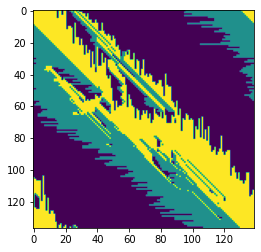

In [44]:
plt.imshow(field)

In [41]:
puzzle.answer_a = n

That's the right answer!  You are one gold star closer to finding the sleigh keys. [Continue to Part Two]
